# Wealth and Income

Import pandas and ydata_profiling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import ydata_profiling

Read wealth_income_dataset.csv info a dataframe

In [2]:
file_path = 'wealth-income/wealth_income_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Income,Wealth,Age,Education,Employment_Status
0,69102.58,640831.61,47,High School,Employed
1,75282.09,300605.21,37,Master's,Unemployed
2,36924.99,281367.33,49,Some College,Employed
3,95439.82,845197.71,62,Bachelor's,Employed
4,47825.32,354803.81,36,Some College,Employed


In [3]:
data.describe()

,Income,Wealth,Age
count,1000000.000000,1.000000e+06,1000000.000000
mean,55124.550724,3.437850e+05,39.984523
std,34596.394980,3.166221e+05,14.009117
min,3928.730000,7.402830e+03,18.000000
25%,31969.992500,1.428560e+05,29.000000
50%,46074.370000,2.511733e+05,39.000000
75%,67858.522500,4.351003e+05,50.000000
max,650034.190000,8.278961e+06,85.000000


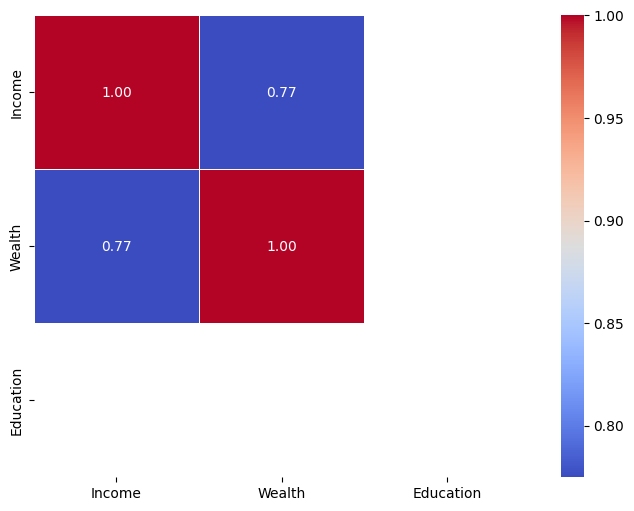

In [23]:
edu_map = {
    "No Formal Education": 0,
    "Primary": 1,
    "High School": 2,
    "Associate Degree": 3,
    "Bachelor's": 4,
    "Master's": 5,
    "Doctorate": 6
}
data["Education"] = data["Education"].map(edu_map)
data["Income"] = pd.to_numeric(data["Income"], errors="coerce")
data["Wealth"] = pd.to_numeric(data["Wealth"], errors="coerce")
selected_data = data[["Income","Wealth","Education"]]
corr_matrix = selected_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [4]:
edu_stats = data.groupby("Education").agg(
    Avg_Income=("Income", "mean"),
    Std_Income=("Income", "std"),
    Avg_Wealth=("Wealth", "mean"),
    Std_Wealth=("Wealth", "std")
).reset_index()

edu_stats

,Education,Avg_Income,Std_Income,Avg_Wealth,Std_Wealth
0,Bachelor's,75857.656165,33463.813779,473139.530913,361039.055998
1,Doctorate,129966.819672,57322.821588,813515.291194,627739.982880
2,High School,43295.278719,19193.555936,269792.292155,205957.489875
3,Master's,97663.367516,43324.082882,608628.010888,465570.701922
4,No High School,32524.983447,14422.123332,202680.225744,154452.629123
5,Some College,54143.460923,24026.084663,337799.189792,257790.380367


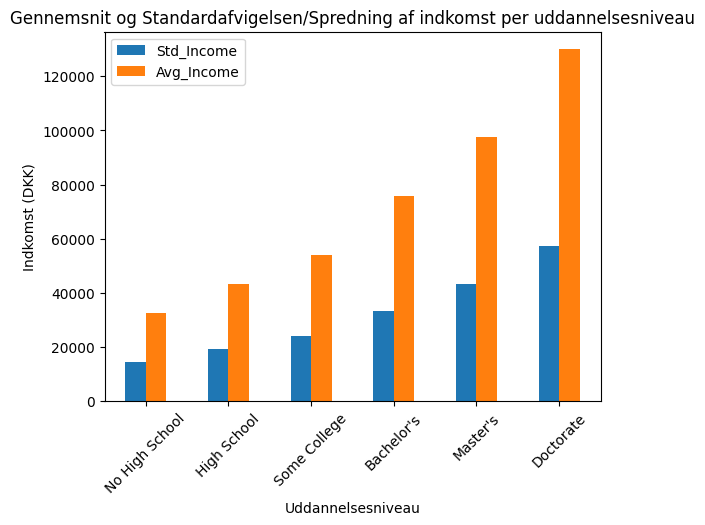

In [5]:
edu_stats.sort_values(by=["Avg_Income"]).plot(x="Education",y=["Std_Income","Avg_Income"],kind="bar")
plt.title("Gennemsnit og Standardafvigelsen/Spredning af indkomst per uddannelsesniveau")
plt.xlabel("Uddannelsesniveau")
plt.ylabel("Indkomst (DKK)")
plt.xticks(rotation=45)
plt.show()

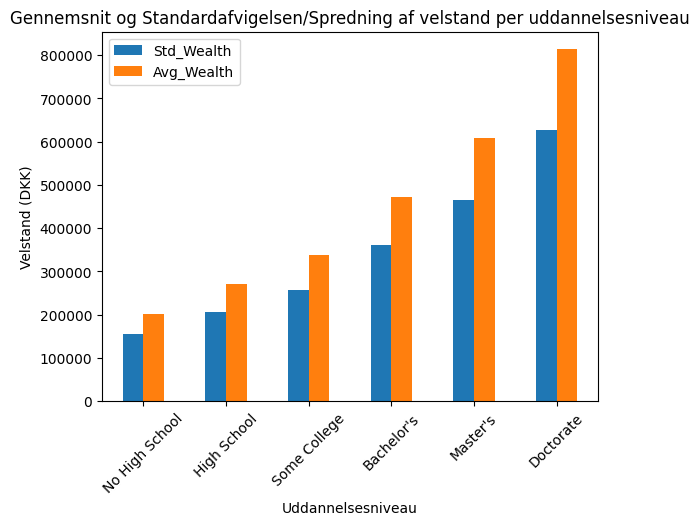

In [6]:
edu_stats.sort_values(by=["Avg_Wealth"]).plot(x="Education",y=["Std_Wealth","Avg_Wealth"],kind="bar")
plt.title("Gennemsnit og Standardafvigelsen/Spredning af velstand per uddannelsesniveau")
plt.xlabel("Uddannelsesniveau")
plt.ylabel("Velstand (DKK)")
plt.xticks(rotation=45)
plt.show()